In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D
from skimage import data
import matplotlib.pyplot as plt

(1, 512, 512, 1)


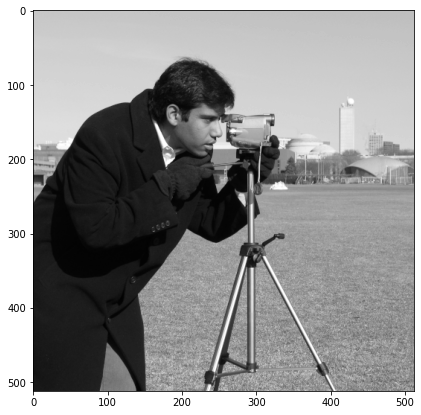

In [4]:
image = data.camera()
plt.figure(figsize=(7,7)) 
plt.imshow(image, cmap="gray")

image = image[None, ..., None].astype(np.float32) / 255. 
print(image.shape)

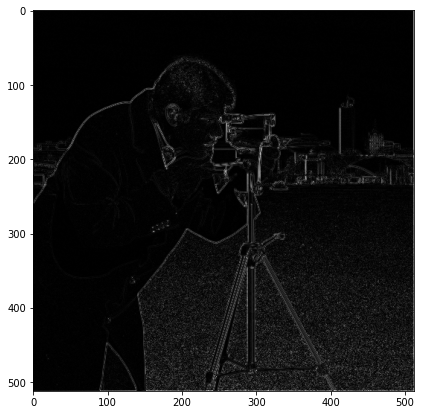

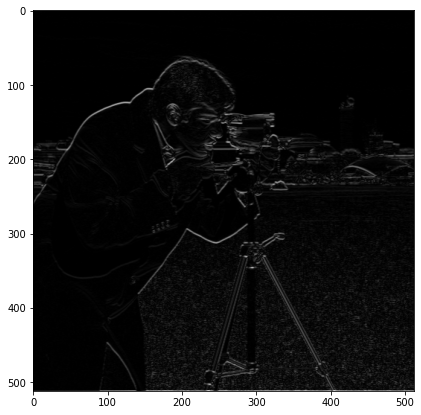

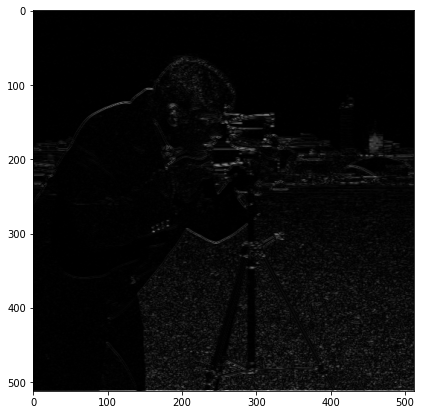

In [5]:
conv_layer = Conv2D(kernel_size=(3, 3), filters=1, use_bias=False, padding="same")
_ = conv_layer(image)

kernel_1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

kernel_2 = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

kernel_3 = np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]])

kernel_1 = kernel_1.reshape((3, 3, 1, 1))
kernel_2 = kernel_2.reshape((3, 3, 1, 1))
kernel_3 = kernel_3.reshape((3, 3, 1, 1))

conv_layer.set_weights([kernel_1])
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
plt.show()

conv_layer.set_weights([kernel_2])
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
plt.show()

conv_layer.set_weights([kernel_3])
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
plt.show()